In [15]:
%matplotlib inline

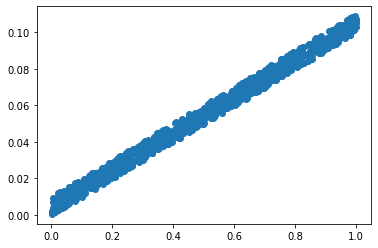

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Random 100 points by numpy
x_data = np.random.rand(1000).astype(np.float32)
y_data = x_data * 0.1 + 0.01*np.random.rand(1000).astype(np.float32)

# plot data
plt.scatter(x_data, y_data)
plt.show()

In [17]:
# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.03, but TensorFlow will
# figure that out for us.) 
# Use tensorflow to find weighting of fitting

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b
print(W)
print(b)
print(y)
tf_x = tf.placeholder(tf.float32, x_data.shape)     # input x
tf_y = tf.placeholder(tf.float32, y_data.shape)     # input y
print(tf_x)
print(tf_y)

<tf.Variable 'Variable_6:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'Variable_7:0' shape=(1,) dtype=float32_ref>
Tensor("add_3:0", shape=(1000,), dtype=float32)
Tensor("Placeholder_4:0", shape=(1000,), dtype=float32)
Tensor("Placeholder_5:0", shape=(1000,), dtype=float32)


In [18]:
# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)
print(loss)
print(optimizer)
print(train)

# Before starting, initialize the variables.  We will 'run' this first.
init = tf.global_variables_initializer()
print(init)

Tensor("Mean_2:0", shape=(), dtype=float32)
name: "GradientDescent_2"
op: "NoOp"
input: "^GradientDescent_2/update_Variable_6/ApplyGradientDescent"
input: "^GradientDescent_2/update_Variable_7/ApplyGradientDescent"

name: "init_2"
op: "NoOp"
input: "^Variable/Assign"
input: "^Variable_1/Assign"
input: "^Variable_2/Assign"
input: "^Variable_3/Assign"
input: "^Variable_4/Assign"
input: "^Variable_5/Assign"
input: "^Variable_6/Assign"
input: "^Variable_7/Assign"



0 [-0.7726746] [0.09227085]


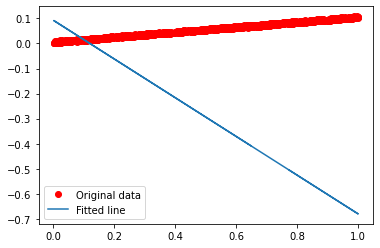

50 [-0.2676979] [0.19753885]


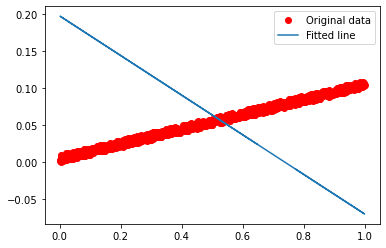

100 [-0.08760133] [0.10315594]


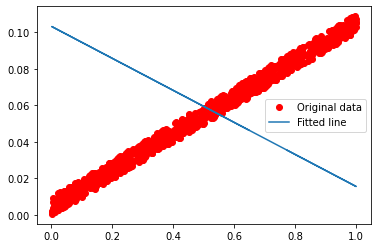

150 [0.00431085] [0.05498758]


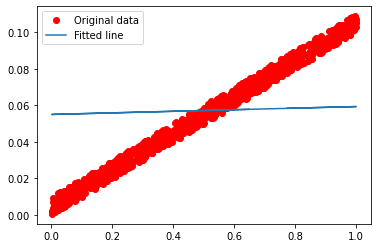

200 [0.0512182] [0.03040488]


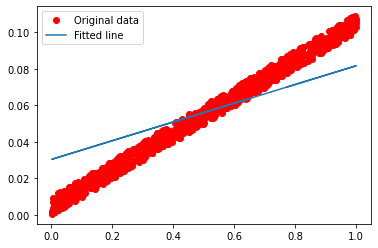

250 [0.07515736] [0.0178591]


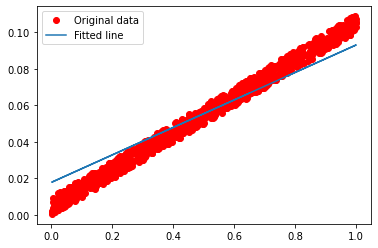

300 [0.08737469] [0.01145637]


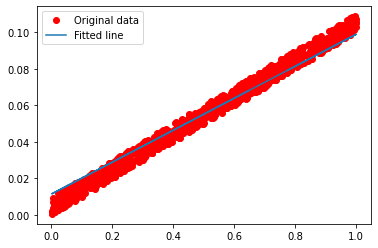

350 [0.09360979] [0.00818874]


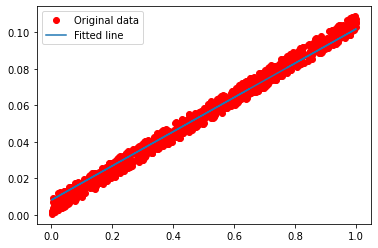

400 [0.09679188] [0.00652111]


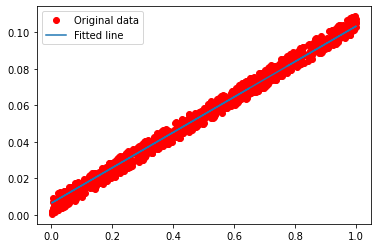

450 [0.09841588] [0.00567002]


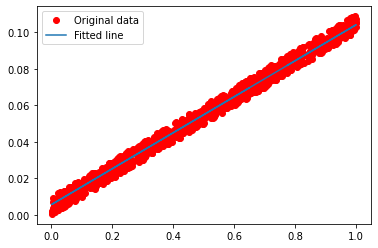

500 [0.09924466] [0.00523568]


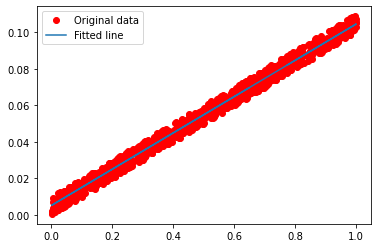

550 [0.09966762] [0.00501402]


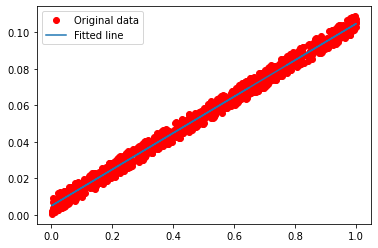

600 [0.09988349] [0.00490089]


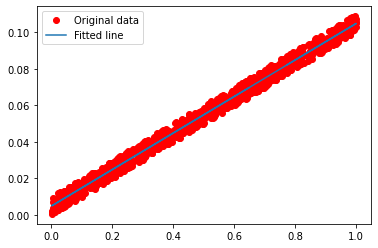

650 [0.09999365] [0.00484316]


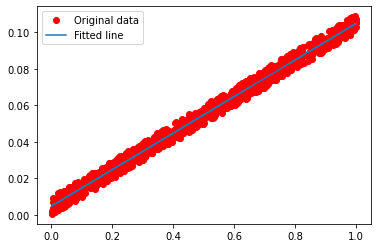

700 [0.10004988] [0.00481369]


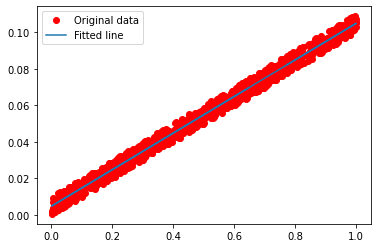

750 [0.10007857] [0.00479865]


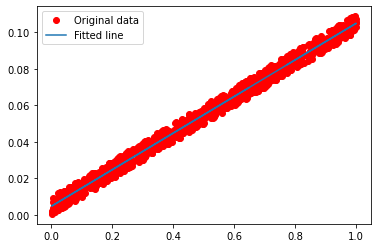

800 [0.10009322] [0.00479098]


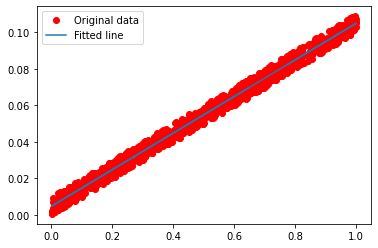

850 [0.1001007] [0.00478706]


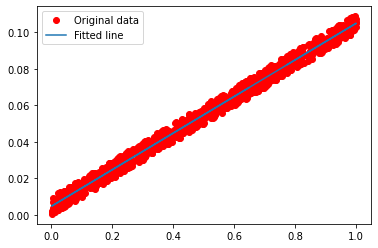

900 [0.10010451] [0.00478506]


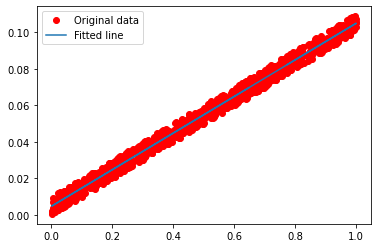

950 [0.10010645] [0.00478405]


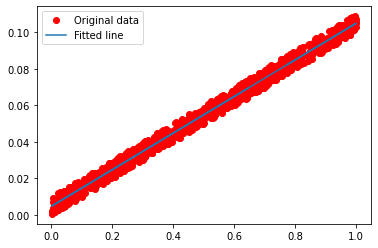

In [19]:
# Launch the graph.
with tf.Session() as sess:
    sess.run(init)
    
    # Fit the line.
    for step in range(1000):
        sess.run(train)
        if step % 50 == 0:
            print(step, sess.run(W), sess.run(b))
            plt.plot(x_data, y_data, 'ro', label='Original data')
            plt.plot(x_data, sess.run(W) * x_data + sess.run(b), label='Fitted line')
            plt.legend()
            plt.show()
            
# Learns best fit is W: [0.1], b: [0.03]